#Student Name: Nelima Otieno
#Student Pace: Fulltime Hybrid
#Instructor Name: Maryann Mwikali

#AVIATION DATA ANALYSIS
##OBJECTIVE
 To identify low risk aircrafts suitable for initial investment in both commercial and private aviation operations.Using historical aircraft accident and incident data as a proxy for risk, this analysis aims to evaluate aircraft types based on safety outcomes and operational reliability.
The findings of this analysis will be translated into actionable, data-driven recommendations to support the head of Fleet Planning and Management in making informed aircraft purchasing decisions. The ultimate goal is to minimize safety, operational, and financial risk while establishing a reliable and scalable aviation fleet.





# Section 1

Importing relevant libraries and loading the data.
Making sure to look at its patterns and understand it

In [2]:
#Importing the relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the DataFrame
df = pd.read_csv("Aviation_Data.csv")
df.head()

/tmp/ipython-input-2606150541.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#Identifying columns in the DataFrame
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
#Getting more information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                23699 non-null  object 
 1   Investigation.Type      23699 non-null  object 
 2   Accident.Number         23699 non-null  object 
 3   Event.Date              23699 non-null  object 
 4   Location                23692 non-null  object 
 5   Country                 23588 non-null  object 
 6   Latitude                6 non-null      float64
 7   Longitude               6 non-null      float64
 8   Airport.Code            12317 non-null  object 
 9   Airport.Name            14108 non-null  object 
 10  Injury.Severity         23698 non-null  object 
 11  Aircraft.damage         23166 non-null  object 
 12  Aircraft.Category       3625 non-null   object 
 13  Registration.Number     23693 non-null  object 
 14  Make                    23692 non-null

In [6]:
#Checking for missing values in each column
df.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,7
Country,111
Latitude,23693
Longitude,23693
Airport.Code,11382
Airport.Name,9591


In [7]:
#Inspecting columns with missing values
df[df.isna().any(axis=1)]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,20001213X29181,Accident,MIA89LA213,1989-08-05,"SARASOTA, FL",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,28-06-1991
23695,20001213X29151,Accident,LAX89LA264,1989-08-05,"PARKER DAM, CA",United States,NaN,NaN,NONE,LAKE HAVASU PALMS,...,Personal,NaN,0.0,0.0,0.0,4.0,VMC,Landing,Probable Cause,16-06-1992
23696,20001213X29102,Accident,DEN89LA191,1989-08-05,"BOULDER, CO",United States,NaN,NaN,1V5,BOULDER,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,02-08-1990
23697,20001213X29097,Accident,DEN89LA186,1989-08-05,"LOVELL, WY",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,3.0,VMC,Maneuvering,Probable Cause,15-05-1992


#Section 2
#Data Cleaning and Preprocessing
#Here we are going to clean and preprocess the data to make it suitable for analysis.This includes handling missing values, converting data types, and renaming columns for better readability.
This dataset contains a lot of columns that are not relevant to our analysis. We will select only the columns that are necessary for our analysis

In [8]:
New_df = df[["Investigation.Type","Accident.Number", "Aircraft.Category","Make","Model", "Number.of.Engines","Engine.Type", "Purpose.of.flight", "Air.carrier", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Event.Date"]].copy()
New_df

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,NaN,Stinson,108-3,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,NaN,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,NaN,Cessna,172M,1.0,Reciprocating,Personal,NaN,3.0,NaN,NaN,NaN,1974-08-30
3,Accident,LAX96LA321,NaN,Rockwell,112,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,NaN,Cessna,501,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Accident,MIA89LA213,NaN,Bell,47G-2,1.0,Reciprocating,Instructional,NaN,0.0,0.0,0.0,1.0,1989-08-05
23695,Accident,LAX89LA264,NaN,Cessna,182,1.0,Reciprocating,Personal,NaN,0.0,0.0,0.0,4.0,1989-08-05
23696,Accident,DEN89LA191,NaN,Cessna,170B,1.0,Reciprocating,Instructional,NaN,0.0,0.0,0.0,1.0,1989-08-05
23697,Accident,DEN89LA186,NaN,Beech,P35,1.0,Reciprocating,Personal,NaN,0.0,0.0,1.0,3.0,1989-08-05


In [9]:
#Checking for duplicated values
New_df.duplicated().sum()

np.int64(0)

In [10]:
#Dropping duplicated values
New_df=New_df.drop_duplicates()

In [11]:
#Checking if we dropped the duplicated values
New_df.duplicated().sum()

np.int64(0)

In [12]:
#Checking for the sum of missing values on the new DataFrame
New_df.isna().sum()

,0
Investigation.Type,0
Accident.Number,0
Aircraft.Category,20074
Make,7
Model,18
Number.of.Engines,277
Engine.Type,5
Purpose.of.flight,34
Air.carrier,22495
Total.Fatal.Injuries,109


In [13]:
#Inspecting columns with missing values
New_df[New_df.isna().any(axis=1)]

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,NaN,Stinson,108-3,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,NaN,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,NaN,Cessna,172M,1.0,Reciprocating,Personal,NaN,3.0,NaN,NaN,NaN,1974-08-30
3,Accident,LAX96LA321,NaN,Rockwell,112,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,NaN,Cessna,501,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Accident,MIA89LA213,NaN,Bell,47G-2,1.0,Reciprocating,Instructional,NaN,0.0,0.0,0.0,1.0,1989-08-05
23695,Accident,LAX89LA264,NaN,Cessna,182,1.0,Reciprocating,Personal,NaN,0.0,0.0,0.0,4.0,1989-08-05
23696,Accident,DEN89LA191,NaN,Cessna,170B,1.0,Reciprocating,Instructional,NaN,0.0,0.0,0.0,1.0,1989-08-05
23697,Accident,DEN89LA186,NaN,Beech,P35,1.0,Reciprocating,Personal,NaN,0.0,0.0,1.0,3.0,1989-08-05


In [14]:
#Creating Injuries column that will help evaluate risk and filling the missing values
Injury_columns = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
New_df[Injury_columns] = New_df[Injury_columns].fillna(0)
New_df

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,NaN,Stinson,108-3,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,NaN,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,NaN,Cessna,172M,1.0,Reciprocating,Personal,NaN,3.0,0.0,0.0,0.0,1974-08-30
3,Accident,LAX96LA321,NaN,Rockwell,112,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,NaN,Cessna,501,NaN,NaN,Personal,NaN,1.0,2.0,0.0,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Accident,MIA89LA213,NaN,Bell,47G-2,1.0,Reciprocating,Instructional,NaN,0.0,0.0,0.0,1.0,1989-08-05
23695,Accident,LAX89LA264,NaN,Cessna,182,1.0,Reciprocating,Personal,NaN,0.0,0.0,0.0,4.0,1989-08-05
23696,Accident,DEN89LA191,NaN,Cessna,170B,1.0,Reciprocating,Instructional,NaN,0.0,0.0,0.0,1.0,1989-08-05
23697,Accident,DEN89LA186,NaN,Beech,P35,1.0,Reciprocating,Personal,NaN,0.0,0.0,1.0,3.0,1989-08-05


In [15]:
#Filling the null values with unkown in the selected columns
categorical_unkown= ["Aircraft.Category", "Engine.Type", "Purpose.of.flight", "Make", "Model","Air.carrier"]
New_df[categorical_unkown] = New_df[categorical_unkown].fillna("Unknown")
New_df

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,Unknown,Stinson,108-3,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,Unknown,Piper,PA24-180,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,Unknown,Cessna,172M,1.0,Reciprocating,Personal,Unknown,3.0,0.0,0.0,0.0,1974-08-30
3,Accident,LAX96LA321,Unknown,Rockwell,112,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,Unknown,Cessna,501,NaN,Unknown,Personal,Unknown,1.0,2.0,0.0,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Accident,MIA89LA213,Unknown,Bell,47G-2,1.0,Reciprocating,Instructional,Unknown,0.0,0.0,0.0,1.0,1989-08-05
23695,Accident,LAX89LA264,Unknown,Cessna,182,1.0,Reciprocating,Personal,Unknown,0.0,0.0,0.0,4.0,1989-08-05
23696,Accident,DEN89LA191,Unknown,Cessna,170B,1.0,Reciprocating,Instructional,Unknown,0.0,0.0,0.0,1.0,1989-08-05
23697,Accident,DEN89LA186,Unknown,Beech,P35,1.0,Reciprocating,Personal,Unknown,0.0,0.0,1.0,3.0,1989-08-05


In [16]:
#Here we are imputing number of engines with the mode
Engines_mode=New_df["Number.of.Engines"].mode()[0]
New_df["Number.of.Engines"]=New_df["Number.of.Engines"].fillna(Engines_mode)
New_df


,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,Unknown,Stinson,108-3,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,1948-10-24
1,Accident,LAX94LA336,Unknown,Piper,PA24-180,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,1962-07-19
2,Accident,NYC07LA005,Unknown,Cessna,172M,1.0,Reciprocating,Personal,Unknown,3.0,0.0,0.0,0.0,1974-08-30
3,Accident,LAX96LA321,Unknown,Rockwell,112,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,1977-06-19
4,Accident,CHI79FA064,Unknown,Cessna,501,1.0,Unknown,Personal,Unknown,1.0,2.0,0.0,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Accident,MIA89LA213,Unknown,Bell,47G-2,1.0,Reciprocating,Instructional,Unknown,0.0,0.0,0.0,1.0,1989-08-05
23695,Accident,LAX89LA264,Unknown,Cessna,182,1.0,Reciprocating,Personal,Unknown,0.0,0.0,0.0,4.0,1989-08-05
23696,Accident,DEN89LA191,Unknown,Cessna,170B,1.0,Reciprocating,Instructional,Unknown,0.0,0.0,0.0,1.0,1989-08-05
23697,Accident,DEN89LA186,Unknown,Beech,P35,1.0,Reciprocating,Personal,Unknown,0.0,0.0,1.0,3.0,1989-08-05


In [17]:
#Confirming if we still have missing values
New_df.isna().sum()

,0
Investigation.Type,0
Accident.Number,0
Aircraft.Category,0
Make,0
Model,0
Number.of.Engines,0
Engine.Type,0
Purpose.of.flight,0
Air.carrier,0
Total.Fatal.Injuries,0


In [18]:
# Converting injury and engine count columns to integer type
int_columns = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Number.of.Engines"]
New_df[int_columns] = New_df[int_columns].astype(int)
New_df.head()


,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,Accident,SEA87LA080,Unknown,Stinson,108-3,1,Reciprocating,Personal,Unknown,2,0,0,0,1948-10-24
1,Accident,LAX94LA336,Unknown,Piper,PA24-180,1,Reciprocating,Personal,Unknown,4,0,0,0,1962-07-19
2,Accident,NYC07LA005,Unknown,Cessna,172M,1,Reciprocating,Personal,Unknown,3,0,0,0,1974-08-30
3,Accident,LAX96LA321,Unknown,Rockwell,112,1,Reciprocating,Personal,Unknown,2,0,0,0,1977-06-19
4,Accident,CHI79FA064,Unknown,Cessna,501,1,Unknown,Personal,Unknown,1,2,0,0,1979-08-02


In [19]:
#Converting "Event.Date" to datetime objects
New_df['Event.Date'] = pd.to_datetime(New_df['Event.Date'])
New_df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      5 non-null      object        
 1   Accident.Number         5 non-null      object        
 2   Aircraft.Category       5 non-null      object        
 3   Make                    5 non-null      object        
 4   Model                   5 non-null      object        
 5   Number.of.Engines       5 non-null      int64         
 6   Engine.Type             5 non-null      object        
 7   Purpose.of.flight       5 non-null      object        
 8   Air.carrier             5 non-null      object        
 9   Total.Fatal.Injuries    5 non-null      int64         
 10  Total.Serious.Injuries  5 non-null      int64         
 11  Total.Minor.Injuries    5 non-null      int64         
 12  Total.Uninjured         5 non-null      int64         

Section 3

In this section we start conducting our analysis with the select matrix.
1. We  use the injury type to see which injury type is the most common
2. We  use the engine type on the total injuries to accertain which engine type is lowrisk
3. Number of engines and total injuries
4. We  also evaluate risk based on make and model, the model and make with the lowest will be the least risky.
5. We use purpose of flight to identify which sector to invest more in, private or public.

In [20]:
#Creating a column for total injuries to get a picture of all injuries in an event
New_df["Total.Injuries"]=New_df["Total.Fatal.Injuries"]+New_df["Total.Serious.Injuries"]+New_df["Total.Minor.Injuries"]
New_df.head()

,Investigation.Type,Accident.Number,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date,Total.Injuries
0,Accident,SEA87LA080,Unknown,Stinson,108-3,1,Reciprocating,Personal,Unknown,2,0,0,0,1948-10-24,2
1,Accident,LAX94LA336,Unknown,Piper,PA24-180,1,Reciprocating,Personal,Unknown,4,0,0,0,1962-07-19,4
2,Accident,NYC07LA005,Unknown,Cessna,172M,1,Reciprocating,Personal,Unknown,3,0,0,0,1974-08-30,3
3,Accident,LAX96LA321,Unknown,Rockwell,112,1,Reciprocating,Personal,Unknown,2,0,0,0,1977-06-19,2
4,Accident,CHI79FA064,Unknown,Cessna,501,1,Unknown,Personal,Unknown,1,2,0,0,1979-08-02,3


In [21]:
#Getting the sum of injuries per type
injury_totals = {"Fatal Injuries": New_df["Total.Fatal.Injuries"].sum(), "Serious Injuries": New_df["Total.Serious.Injuries"].sum(), "Minor Injuries": New_df["Total.Minor.Injuries"].sum()}
injury_totals

{'Fatal Injuries': np.int64(10357),
 'Serious Injuries': np.int64(4801),
 'Minor Injuries': np.int64(7925)}

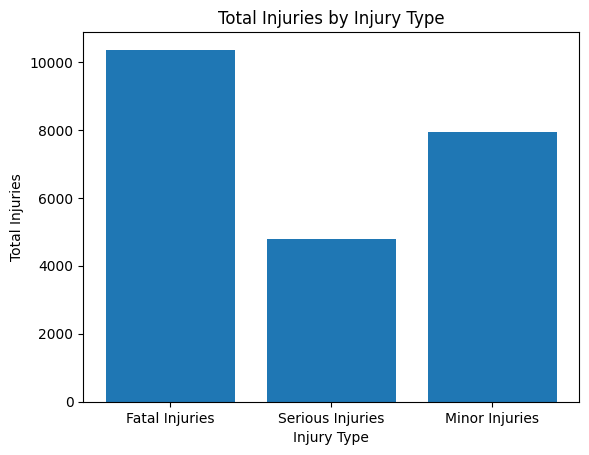

In [22]:
#Lets visualize that by plotting a bar chart that compares fatal, serious and minor injuries
plt.figure()
plt.bar(injury_totals.keys(), injury_totals.values())
plt.xlabel("Injury Type")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Injury Type")
plt.show()

Findings from the visual

The visual clearly shows that fatal injuries are the most prevalent followed by minor then serious injuries.

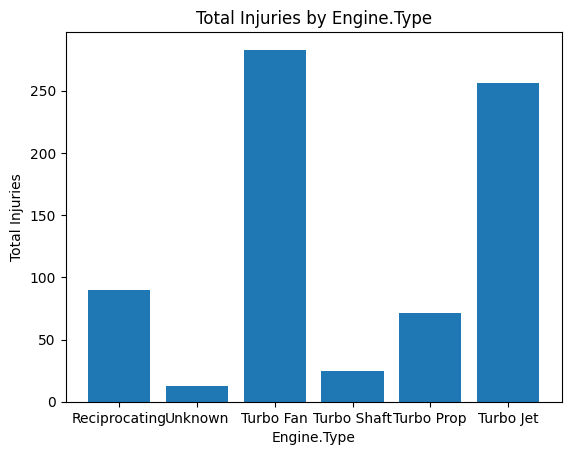

In [23]:
#Lets plot the Engine type against  injury totals
plt.figure()
plt.bar(New_df["Engine.Type"], New_df["Total.Injuries"])
plt.xlabel("Engine.Type")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Engine.Type")
plt.show()

Here it is clear that the Turbo jet causes the highest total injuries.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

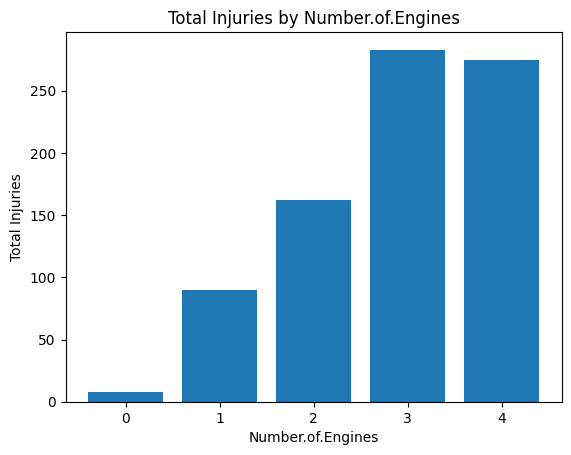

In [24]:
#Plotting number of engines total injuries
plt.figure()
plt.bar(New_df["Number.of.Engines"], New_df["Total.Injuries"])
plt.xlabel("Number.of.Engines")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Number.of.Engines")
plt

. The total number of injuries increase with the number of Engines in an aircraft.

In [33]:
#Evaluating risk by Make and Model
Risk_by_make_model = (New_df.groupby(["Make", "Model", "Purpose.of.flight"])["Total.Injuries"].mean().reset_index().sort_values("Total.Injuries"))
Risk_by_make_model.head(10)

,Make,Model,Purpose.of.flight,Total.Injuries
5067,Petracca,GLASAIR SH-2,Personal,0.0
2005,Cessna,172D,Instructional,0.0
2007,Cessna,172E,Aerial Observation,0.0
2015,Cessna,172F,Instructional,0.0
5079,Pickel,SMITH MINIPLANE,Personal,0.0
5080,Pierce,GS-1,Personal,0.0
5083,Pietenpol-grega,GN1,Personal,0.0
5088,Pilatus,PC-6/C-H2,Personal,0.0
5058,Pennington-eaa Biplane,P2P,Personal,0.0
5060,Perkins,DRAGONFLY,Personal,0.0


Aircraft risk was calculated as the average number of injuries per accident grouped by make and model.
The make and the model at the top is the least risky.

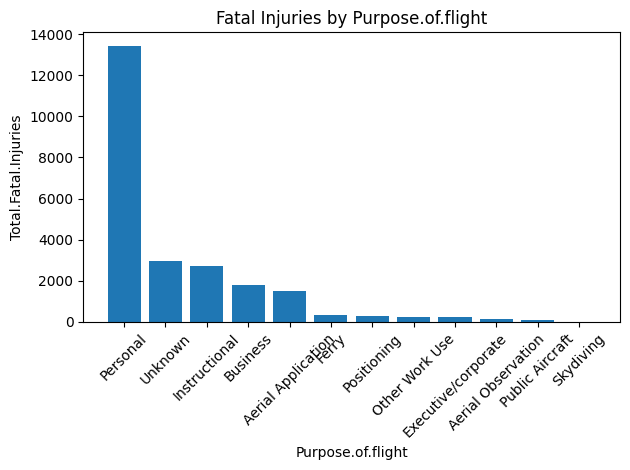

In [26]:
#Loking at the relationship between purpose of flight and Total fatal injuries
purpose_counts=New_df["Purpose.of.flight"].value_counts()
plt.figure()
plt.bar(purpose_counts.index, purpose_counts.values)
plt.xlabel("Purpose.of.flight")
plt.ylabel("Total.Fatal.Injuries")
plt.title("Fatal Injuries by Purpose.of.flight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It is clear that personal aircrafts caused the highest number of fatal accidents. Therefore presents a high risk.

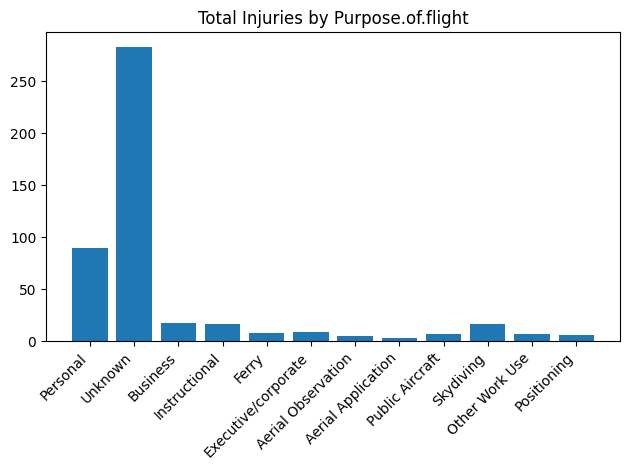

In [27]:
#Now let us see how the purpose of flight relate to the total injuries
plt.figure()
plt.bar(New_df["Purpose.of.flight"], New_df["Total.Injuries"])
plt.xticks(rotation=45, ha="right")
plt.title("Total Injuries by Purpose.of.flight")
plt.tight_layout()
plt.show()

It is clear that personal aircrafts caused more accidents compared to public aircrafts

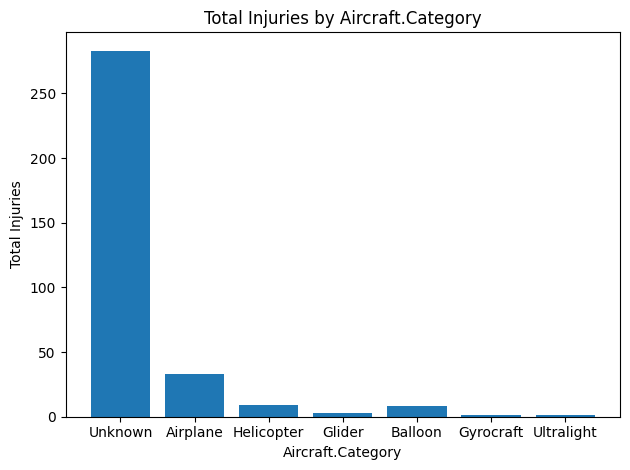

In [28]:
#By aircraft cartegory
plt.figure()
plt.bar(New_df["Aircraft.Category"], New_df["Total.Injuries"])
plt.xlabel("Aircraft.Category")
plt.ylabel("Total Injuries")
plt.title("Total Injuries by Aircraft.Category")
plt.tight_layout()
plt.show()

Conclusions/Findings
1. Fatal injuries are the most common and highest severity outcome.
2. Turbojet engines are associated with higher total injuries compared to piston engines.
3. More engines correlate with higher total injuries.
4. Personal flights account for the highest number of fatal and total injuries, suggesting elevated risk in private aviation.




